In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('datasets/lab6.txt', sep = '\t', header=None)
df.columns = ['X_1', 'X_2', 'Y']
df.head()

,X_1,X_2,Y
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


In [3]:
n_samples = df.shape[0]
n_features = df.shape[1] - 1
n_samples, n_features

(373, 2)

In [4]:
# making the feature vector
X = np.zeros((n_samples, n_features))
for i in range(n_samples):
    X[i] = df['X_1'][i], df['X_2'][i]
X, X.shape

(array([[ 0.85, 17.45],
        [ 0.75, 15.6 ],
        [ 3.3 , 15.45],
        [ 5.25, 14.2 ],
        [ 4.9 , 15.65],
        [ 5.35, 15.85],
        [ 5.1 , 17.9 ],
        [ 4.6 , 18.25],
        [ 4.05, 18.75],
        [ 3.4 , 19.7 ],
        [ 2.9 , 21.15],
        [ 3.1 , 21.85],
        [ 3.9 , 21.85],
        [ 4.4 , 20.05],
        [ 7.2 , 14.5 ],
        [ 7.65, 16.5 ],
        [ 7.1 , 18.65],
        [ 7.05, 19.9 ],
        [ 5.85, 20.55],
        [ 5.5 , 21.8 ],
        [ 6.55, 21.8 ],
        [ 6.05, 22.3 ],
        [ 5.2 , 23.4 ],
        [ 4.55, 23.9 ],
        [ 5.1 , 24.4 ],
        [ 8.1 , 26.35],
        [10.15, 27.7 ],
        [ 9.75, 25.5 ],
        [ 9.2 , 21.1 ],
        [11.2 , 22.8 ],
        [12.6 , 23.1 ],
        [13.25, 23.5 ],
        [11.65, 26.85],
        [12.45, 27.55],
        [13.3 , 27.85],
        [13.7 , 27.75],
        [14.15, 26.9 ],
        [14.05, 26.55],
        [15.15, 24.2 ],
        [15.2 , 24.75],
        [12.2 , 20.9 ],
        [12.15, 

In [5]:
# making the adjacency matrix W
sigma = 10
W = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    sum = 0
    for j in range(n_samples):
        if (i != j):
            W[i][j] = np.exp(-(np.sum((X[i] - X[j])**2)) / sigma)
        else :
            W[i][j] = 0
W

array([[0.00000000e+00, 7.09460824e-01, 3.67787483e-01, ...,
        1.78727242e-61, 1.29794344e-65, 5.85298174e-67],
       [7.09460824e-01, 0.00000000e+00, 5.20742292e-01, ...,
        6.22781635e-62, 5.11468666e-66, 2.20494206e-67],
       [3.67787483e-01, 5.20742292e-01, 0.00000000e+00, ...,
        6.22357824e-54, 9.78582973e-58, 5.15785341e-59],
       ...,
       [1.78727242e-61, 6.22781635e-62, 6.22357824e-54, ...,
        0.00000000e+00, 8.41768705e-01, 7.54839602e-01],
       [1.29794344e-65, 5.11468666e-66, 9.78582973e-58, ...,
        8.41768705e-01, 0.00000000e+00, 9.83143685e-01],
       [5.85298174e-67, 2.20494206e-67, 5.15785341e-59, ...,
        7.54839602e-01, 9.83143685e-01, 0.00000000e+00]])

In [6]:
# making the degree matrix
D = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    D[i, i] = np.sum(W[i])
D

array([[ 2.95023744,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  2.18226288,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  4.84992957, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 15.31985729,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        20.19265266,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 19.41083541]])

In [7]:
# laplacian Matrix L
L = D - W
# eigen value decomposition of L
eigenvalues, eigenvectors = np.linalg.eig(L)
# we need to sort both eigenvalues and eigenvectors otherwise their pair mismatches
idx = np.argsort(eigenvalues) # in ascending order
eig_vals = eigenvalues[idx]
eig_vecs = eigenvectors[:, idx]

In [8]:
eigenvalues

array([1.33226763e-15, 1.12205063e-01, 3.43733303e-01, 8.32785413e-01,
       1.24640924e+00, 1.57777432e+00, 1.99596524e+00, 2.08015570e+00,
       2.41173461e+00, 2.56597688e+00, 3.20973776e+00, 3.33154666e+00,
       3.47415633e+00, 4.06189078e+00, 4.20077689e+00, 4.42963237e+00,
       4.45504264e+00, 4.66993171e+00, 4.94315225e+00, 5.07173223e+00,
       5.52830113e+00, 5.31284969e+00, 5.46002253e+00, 5.81617642e+00,
       6.02556776e+00, 6.15574320e+00, 6.26242013e+00, 6.79707356e+00,
       6.88973075e+00, 6.97548413e+00, 7.19909911e+00, 7.25459797e+00,
       9.16013871e+00, 7.43328829e+00, 7.60507195e+00, 9.00734888e+00,
       8.86849538e+00, 8.83061559e+00, 7.67240475e+00, 7.74601784e+00,
       7.92618216e+00, 7.89693280e+00, 7.98074089e+00, 8.48635861e+00,
       8.38537486e+00, 8.19805081e+00, 8.31397527e+00, 8.30310048e+00,
       1.07398577e+01, 1.05902984e+01, 9.29674969e+00, 1.04210157e+01,
       9.48962317e+00, 9.57020980e+00, 1.02218182e+01, 9.65662233e+00,
      

In [9]:
eigenvectors

array([[ 5.17780373e-02,  1.92287078e-01,  8.65299622e-02, ...,
        -1.05781889e-12, -8.76975623e-13, -2.01753048e-14],
       [ 5.17780373e-02,  1.97847215e-01,  9.52163955e-02, ...,
         1.18436058e-13,  1.11536839e-12,  6.02206947e-14],
       [ 5.17780373e-02,  1.90394308e-01,  8.41733812e-02, ...,
        -1.65178902e-11, -9.04190375e-13,  4.22492421e-13],
       ...,
       [ 5.17780373e-02, -3.07141946e-02,  5.85104041e-02, ...,
         1.19027743e-04,  2.60727566e-04,  1.26897090e-03],
       [ 5.17780373e-02, -3.06715451e-02,  5.82581467e-02, ...,
         1.36468463e-04,  3.03652973e-04,  1.41664272e-03],
       [ 5.17780373e-02, -3.06930471e-02,  5.83843836e-02, ...,
         1.35561172e-04,  3.06222285e-04,  1.41859544e-03]])

In [10]:
eigenvalues.shape, eigenvectors.shape

((373,), (373, 373))

In [11]:
# optimal cluster assignment matrix H
H = eig_vecs[:, :2]
H.shape

(373, 2)

In [12]:
kmeans = KMeans(n_clusters=2, random_state=42)
predicted_labels = kmeans.fit_predict(H)

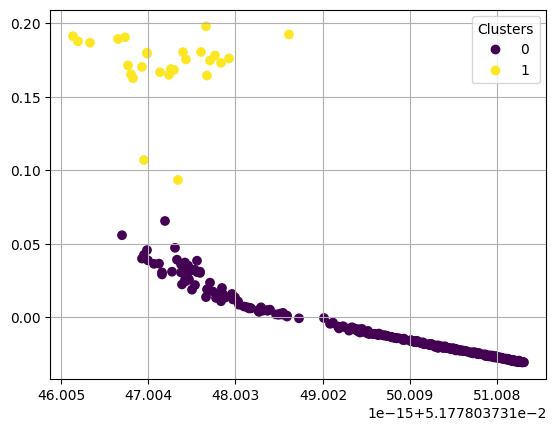

In [13]:
# plotting the spectral embeddings
scatter = plt.scatter(H[:, 0], H[:, 1], c=predicted_labels)
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.grid(True)

In [14]:
predicted_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
ground_truth_labels = df['Y']
ground_truth_labels = ground_truth_labels.replace({1:0, 2:1})
ground_truth_labels = ground_truth_labels.to_numpy()
ground_truth_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [18]:
# Option 1: direct comparison
acc1 = np.sum(predicted_labels == ground_truth_labels) / len(ground_truth_labels)

# Option 2: swapped comparison
acc2 = np.sum(1 - predicted_labels == ground_truth_labels) / len(ground_truth_labels)

# Take the maximum accuracy
accuracy = max(acc1, acc2) * 100
accuracy

np.float64(81.23324396782841)